In [2]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine
csv_database = create_engine('sqlite:///csv_database.db')


import pickle
geolocations = pickle.load( open( "cities.pkl", "rb" ) )
cleangeolocations = pickle.load( open( "citiesnopunc.pkl", "rb" ) )

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [19]:
import string as stringlib

def dfgen(month,year):
    sqlstring='SELECT [Town/City], District, Price, strftime("%Y",DateofTransfer)as Year, strftime("%m",DateofTransfer)as Month FROM "table"  WHERE Cast(Year as int)== '+str(year)+ ' AND Cast(Month as int)== '+str(month) 
    return pd.read_sql_query(sqlstring, csv_database)
    
def mmtestgen():
    sqlstring='SELECT distinct([Town/City]), District FROM "table"'  
    return pd.read_sql_query(sqlstring, csv_database)
    
def clean_string(string):
 for char in stringlib.punctuation:
     string = string.replace(char,'').replace(' ', '')
 return string.upper()

In [20]:
tgdf=mmtestgen()

In [9]:
def cit_dist(df): 
    return (list(map(clean_string,df['Town/City'].values)), list(map(clean_string,df['District'].values)))

#rows whose city entry is london need to be divided up between their various districts
def cleangeolocationslsp(city,district):
    if city != 'LONDON':
        return cleangeolocations.get(city)
    else:
        return cleangeolocations.get(district)

In [21]:
plotdata=list(map(cleangeolocationslsp,cit_dist(tgdf)[0],cit_dist(tgdf)[1]))
geofailindices=(np.where(pd.isnull(plotdata))[0]).tolist()
#set(locations.loc[geofailindices])
tgdf.iloc[geofailindices]

Town/City            District
6059    LONDON  RHONDDA CYNON TAFF

In [30]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors

#Input a dataframe of format: Town/City	Price	Year	Month	
def plotgen(df):
    cleanlocations=cit_dist(df)
    

    cleanplotdata=list(map(cleangeolocationslsp,cit_dist(df)[0],cit_dist(df)[1]))
    
    cleanfplotdata=list(filter(lambda x:type(x)==tuple,cleanplotdata))
    
    geofailindices=(np.where(pd.isnull(cleanplotdata))[0]).tolist()
    print(df.iloc[geofailindices])
    df=df.drop(df.index[geofailindices])
    
    mydate=df.iloc[0,4] +'-'+ df.iloc[0,3] 
    filepath='plots/'+mydate+'.png'
    
    print(mydate+' '+str(len(cleanplotdata))+' entries ' +str(len(cleanfplotdata)-len(cleanplotdata)) +' failed geolocations')
    y=[cpd[0] for cpd in cleanfplotdata]
    x=[cpd[1] for cpd in cleanfplotdata]
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])
    cmap = plt.cm.jet
    norm = matplotlib.colors.LogNorm(vmin=50000,vmax=740000)

    

    fig = plt.figure(figsize=(10,20))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    plt.figure(figsize=(12,6))

    ax.set_extent([ -7.781181, 2.514105,48.467529, 57.805202,])
    ax.add_feature(land_50m)
    ax.scatter(x,y,color=cmap(norm(df.Price.values)),s=1.5, zorder=10)
    ax.text( 0.3,57, mydate, fontsize=15)
    
    fig.savefig(filepath)
    plt.show()
    return ax

In [1]:
for i in range(2004,2018):
    for j in range(1,13):
        plotgen(dfgen(j,i))
#02-2004 problem

In [28]:

for i in range(1995,2005):
    for j in range(1,13):
        print(i,j)


1995 1
1995 2
1995 3
1995 4
1995 5
1995 6
1995 7
1995 8
1995 9
1995 10
1995 11
1995 12
1996 1
1996 2
1996 3
1996 4
1996 5
1996 6
1996 7
1996 8
1996 9
1996 10
1996 11
1996 12
1997 1
1997 2
1997 3
1997 4
1997 5
1997 6
1997 7
1997 8
1997 9
1997 10
1997 11
1997 12
1998 1
1998 2
1998 3
1998 4
1998 5
1998 6
1998 7
1998 8
1998 9
1998 10
1998 11
1998 12
1999 1
1999 2
1999 3
1999 4
1999 5
1999 6
1999 7
1999 8
1999 9
1999 10
1999 11
1999 12
2000 1
2000 2
2000 3
2000 4
2000 5
2000 6
2000 7
2000 8
2000 9
2000 10
2000 11
2000 12
2001 1
2001 2
2001 3
2001 4
2001 5
2001 6
2001 7
2001 8
2001 9
2001 10
2001 11
2001 12
2002 1
2002 2
2002 3
2002 4
2002 5
2002 6
2002 7
2002 8
2002 9
2002 10
2002 11
2002 12
2003 1
2003 2
2003 3
2003 4
2003 5
2003 6
2003 7
2003 8
2003 9
2003 10
2003 11
2003 12
2004 1
2004 2
2004 3
2004 4
2004 5
2004 6
2004 7
2004 8
2004 9
2004 10
2004 11
2004 12


      Town/City            District  Price  Year Month
81569    LONDON  RHONDDA CYNON TAFF  45950  2004    02
02-2004 92446 entries -1 failed geolocations


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


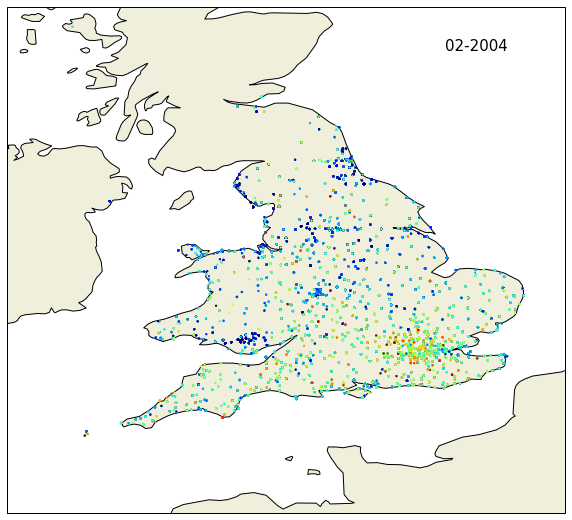

<Figure size 864x432 with 0 Axes>

In [27]:
plotgen(dfgen(2,2004))


In [85]:
import cv2

img=[]
months=["%02d" % x for x in range(1,13)]
for i in range(1997,2001):
    for j in months:
        print('plots/'+str(j)+'-'+str(i)+'.png')
        cv2.imshow('plots/'+str(j)+'-'+str(i)+'.png',img)

#height,width,layers=img[1].shape


#video=cv2.VideoWriter('video.avi',-1,1,(width,height))

#for x in img:
#    video.write(x)

                      
 
cv2.destroyAllWindows()
#video.release()

plots/01-1997.png


TypeError: mat is not a numpy array, neither a scalar

In [56]:
import cv2

months=["%02d" % x for x in range(1,13)]
img=[]
for i in range(1995,2018):
    for j in months:
        if os.path.isfile('plots/'+str(j)+'-'+str(i)+'.png')==True:
            img.append(cv2.imread('plots/'+str(j)+'-'+str(i)+'.png'))



    
height , width , layers =  img[0].shape

video = cv2.VideoWriter('video.avi', cv2.VideoWriter_fourcc(*"MJPG"),3,(width,height))

for x in img:
    #print(type(x))
    video.write(x)

cv2.destroyAllWindows()
video.release()

In [70]:
["%02d" % x for x in range(1,13)]

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [51]:
print(os.path.isfile("/etc/password.txt"))


False
